In [28]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
from sklearn.preprocessing import LabelEncoder


In [30]:
students_grading  = pd.read_csv("data\Students_Grading_Dataset_Biased.csv")
                         # ,usecols = ["Age","Total_Score","Study_Hours_per_Week" ,"Student_ID" ,"Attendance (%)","Extracurricular_Activities","Stress_Level (1-10)","Internet_Access_at_Home","Department","Sleep_Hours_per_Night","Participation_Score","Grade"]    )
students_grading.drop(["Student_ID","First_Name","Last_Name","Email"],axis=1, inplace=True)
students_grading.head()


,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


### DATA CLEANING

In [31]:
# students_grading["Midterm_Score"] = 100-students_grading["Midterm_Score"]
# students_grading["Final_Score"] = 1-students_grading["Final_Score"]
# students_grading["Assignments_Avg"] = 1-students_grading["Assignments_Avg"]


In [32]:
null_columns =students_grading.columns[students_grading.isna().any()].tolist()
print(null_columns)

['Attendance (%)', 'Assignments_Avg', 'Parent_Education_Level']


In [33]:
students_grading["Attendance (%)"] = students_grading["Attendance (%)"].fillna(students_grading["Attendance (%)"].mean())
students_grading["Assignments_Avg"] = students_grading["Assignments_Avg"].fillna(students_grading["Assignments_Avg"].mean())
students_grading["Parent_Education_Level"] = students_grading["Parent_Education_Level"].fillna("Not Reported")

### Visualization

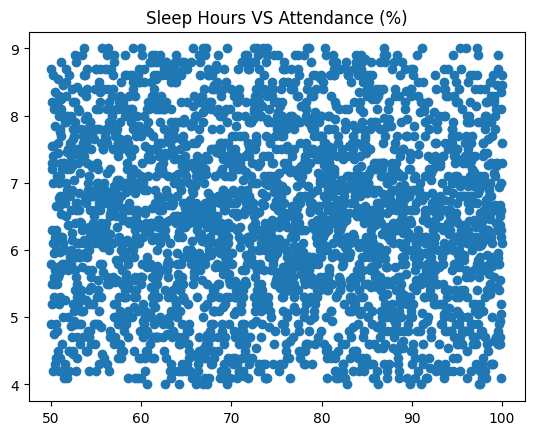

In [34]:
scores_and_internetAccess= students_grading[["Sleep_Hours_per_Night","Attendance (%)"]].groupby("Attendance (%)").mean().reset_index()
plt.scatter(scores_and_internetAccess["Attendance (%)"],scores_and_internetAccess["Sleep_Hours_per_Night"])
plt.title("Sleep Hours VS Attendance (%)")
plt.show()

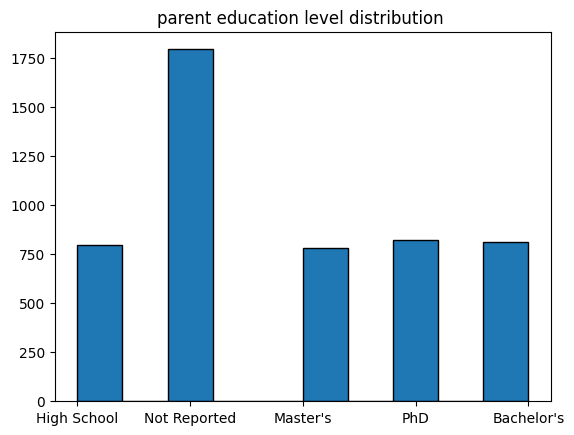

In [35]:
plt.hist(students_grading["Parent_Education_Level"],edgecolor='black')
plt.title("parent education level distribution ")
plt.show() 

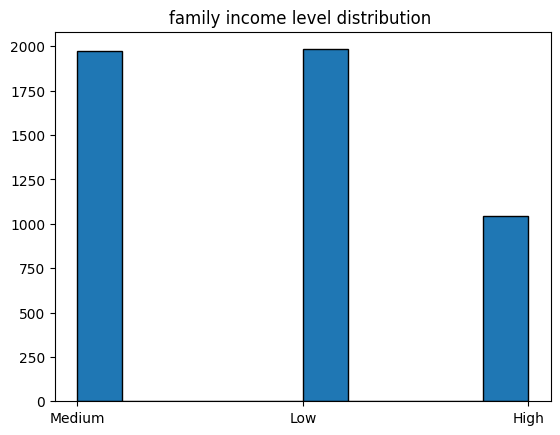

In [36]:
plt.hist(students_grading["Family_Income_Level"],edgecolor='black')
plt.title("family income level distribution ")
plt.show() 

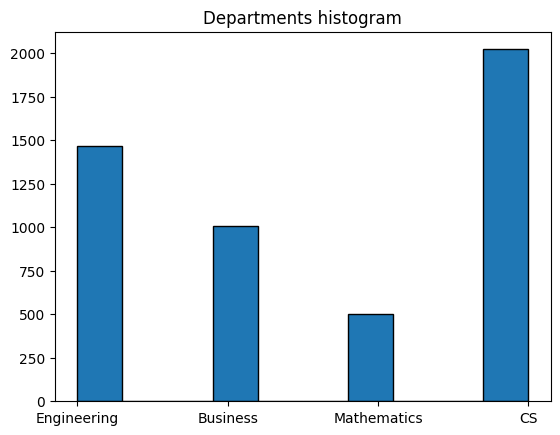

In [37]:
plt.hist(students_grading["Department"],edgecolor='black')
plt.title("Departments histogram")
plt.show() 

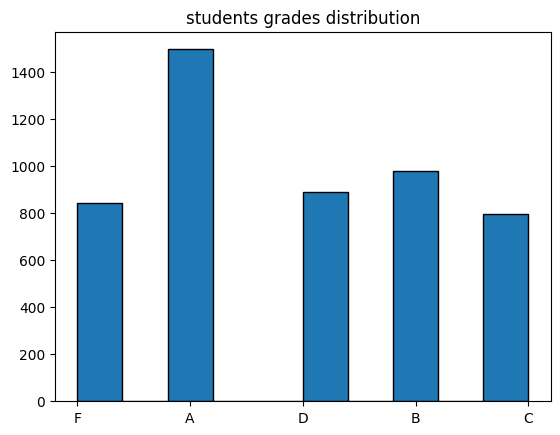

In [38]:
plt.hist(students_grading["Grade"],edgecolor='black')
plt.title("students grades distribution")
plt.show() 

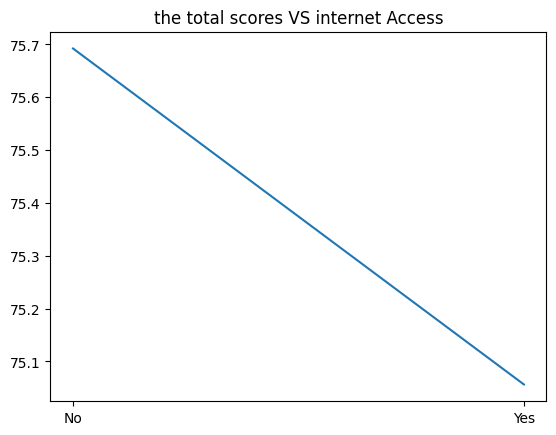

In [39]:
scores_and_internetAccess= students_grading[["Internet_Access_at_Home","Total_Score"]].groupby("Internet_Access_at_Home").mean().reset_index()
plt.plot(scores_and_internetAccess["Internet_Access_at_Home"],scores_and_internetAccess["Total_Score"])
plt.title("the total scores VS internet Access")
plt.show()

Text(0, 0.5, 'Frequency')

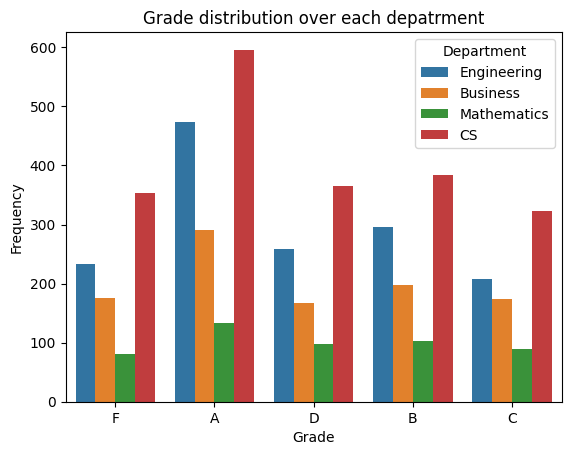

In [40]:
sns.countplot(data=students_grading, x='Grade', hue = 'Department')
plt.title('Grade distribution over each depatrment')
plt.xlabel('Grade')
plt.ylabel('Frequency')

### Correlation Matrix

Gender                        0.014591
Age                           0.018937
Department                   -0.010759
Attendance (%)               -0.572927
Midterm_Score                 0.014109
Final_Score                   0.028252
Assignments_Avg               0.026071
Quizzes_Avg                   0.029829
Participation_Score           0.017419
Projects_Score                0.013770
Total_Score                   0.023628
Grade                         1.000000
Study_Hours_per_Week         -0.002596
Extracurricular_Activities    0.009251
Internet_Access_at_Home       0.005241
Parent_Education_Level       -0.015760
Family_Income_Level          -0.000640
Stress_Level (1-10)          -0.024795
Sleep_Hours_per_Night         0.018178
Name: Grade, dtype: float64


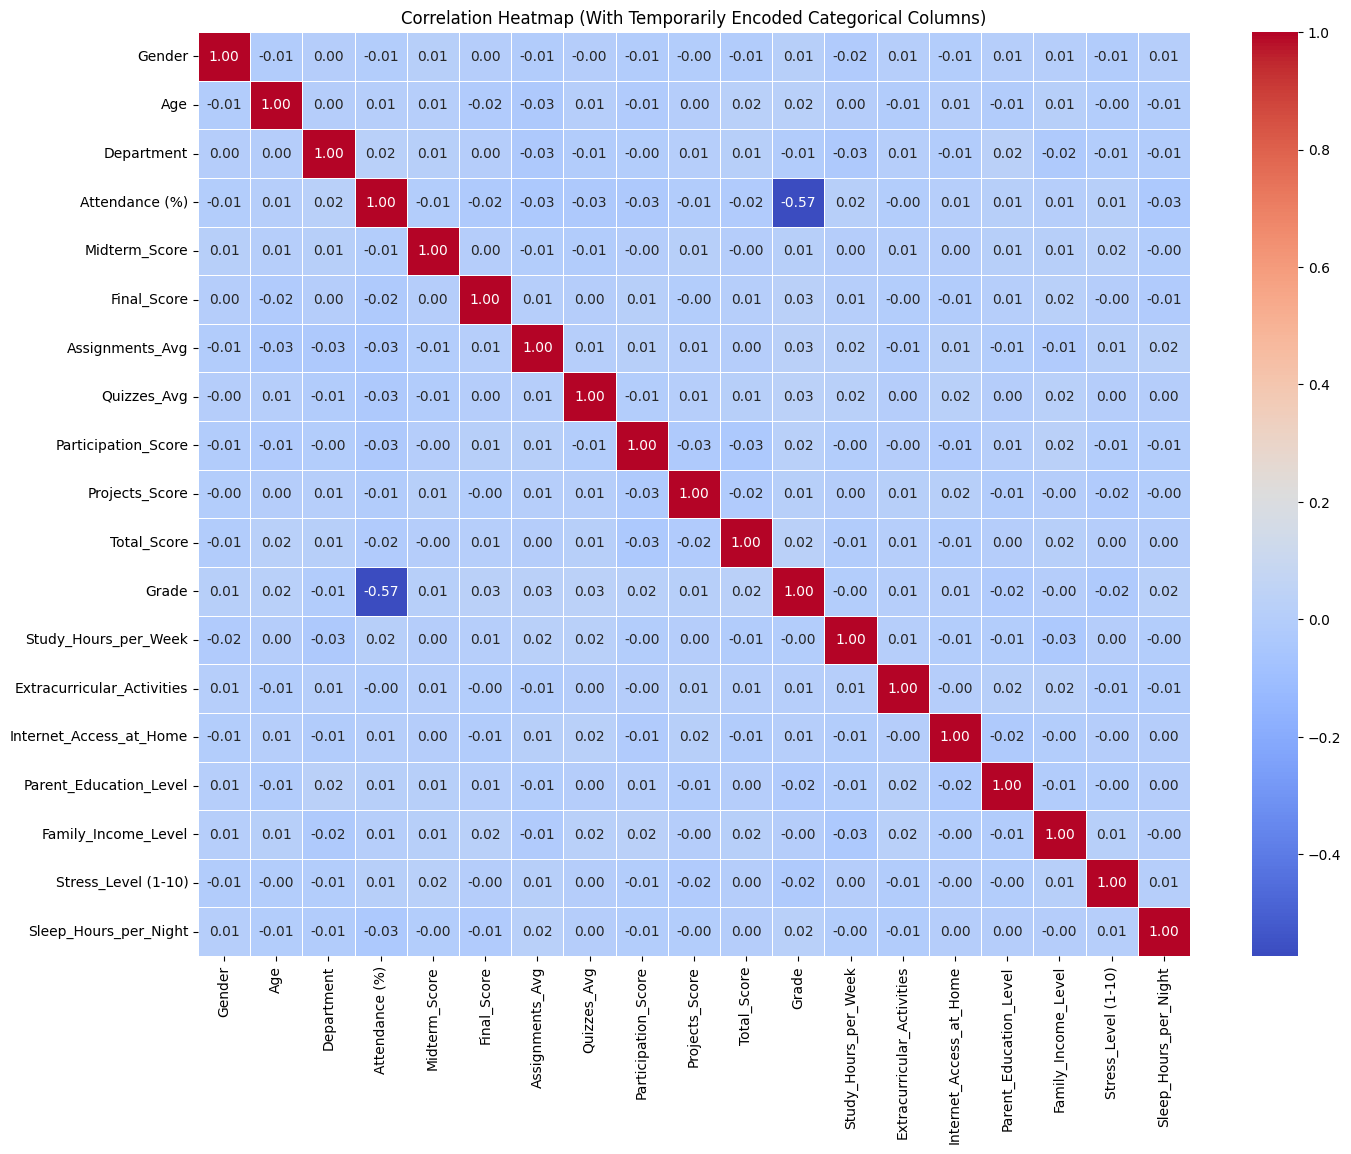

🔍 Top Correlated Column Pairs:
                 Feature 1             Feature 2  Correlation
212                  Grade        Attendance (%)    -0.572927
345  Sleep_Hours_per_Night        Attendance (%)    -0.034475
198            Total_Score   Participation_Score    -0.034289
117        Assignments_Avg        Attendance (%)    -0.034073
244   Study_Hours_per_Week   Family_Income_Level    -0.033361
115        Assignments_Avg                   Age    -0.031418
144            Quizzes_Avg                 Grade     0.029829
50              Department  Study_Hours_per_Week    -0.028696
155    Participation_Score        Attendance (%)    -0.028304
106            Final_Score                 Grade     0.028252


In [41]:
df_temp = students_grading.copy()

label_encoders = {}
for col in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])

# Compute the correlation matrix
correlation_matrix = df_temp.corr()
print(correlation_matrix["Grade"])
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("🔍 Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs


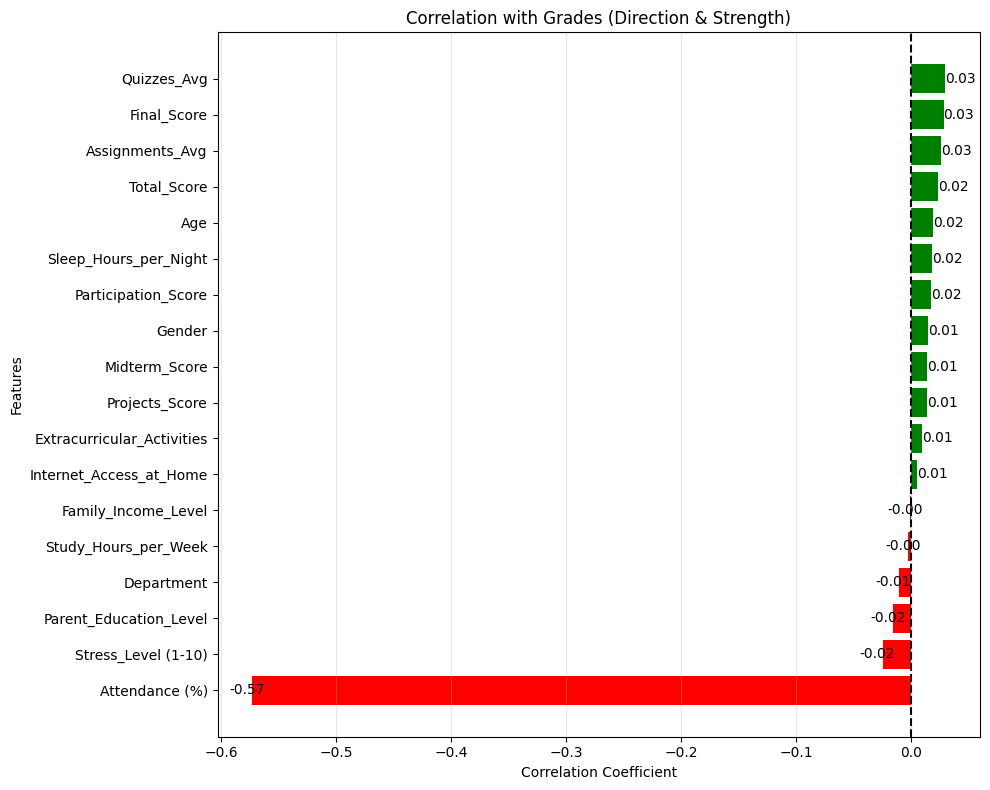

📊 Correlation with Grades:
Attendance (%)               -0.572927
Stress_Level (1-10)          -0.024795
Parent_Education_Level       -0.015760
Department                   -0.010759
Study_Hours_per_Week         -0.002596
Family_Income_Level          -0.000640
Internet_Access_at_Home       0.005241
Extracurricular_Activities    0.009251
Projects_Score                0.013770
Midterm_Score                 0.014109
Gender                        0.014591
Participation_Score           0.017419
Sleep_Hours_per_Night         0.018178
Age                           0.018937
Total_Score                   0.023628
Assignments_Avg               0.026071
Final_Score                   0.028252
Quizzes_Avg                   0.029829
Name: Grade, dtype: float64


In [42]:
# Assuming 'Grades' is your target column (already label encoded in df_temp)
grades_corr = correlation_matrix['Grade'].drop('Grade').sort_values()

# Create a bar plot showing correlation with grades
plt.figure(figsize=(10, 8))
bars = plt.barh(grades_corr.index, grades_corr.values, 
                color=np.where(grades_corr.values >= 0, 'green', 'red'))

# Add correlation values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width if width >=0 else width - 0.02,  # Position text
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             va='center')

plt.axvline(0, color='black', linestyle='--')
plt.title("Correlation with Grades (Direction & Strength)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Correlation with Grades:")
print(grades_corr)

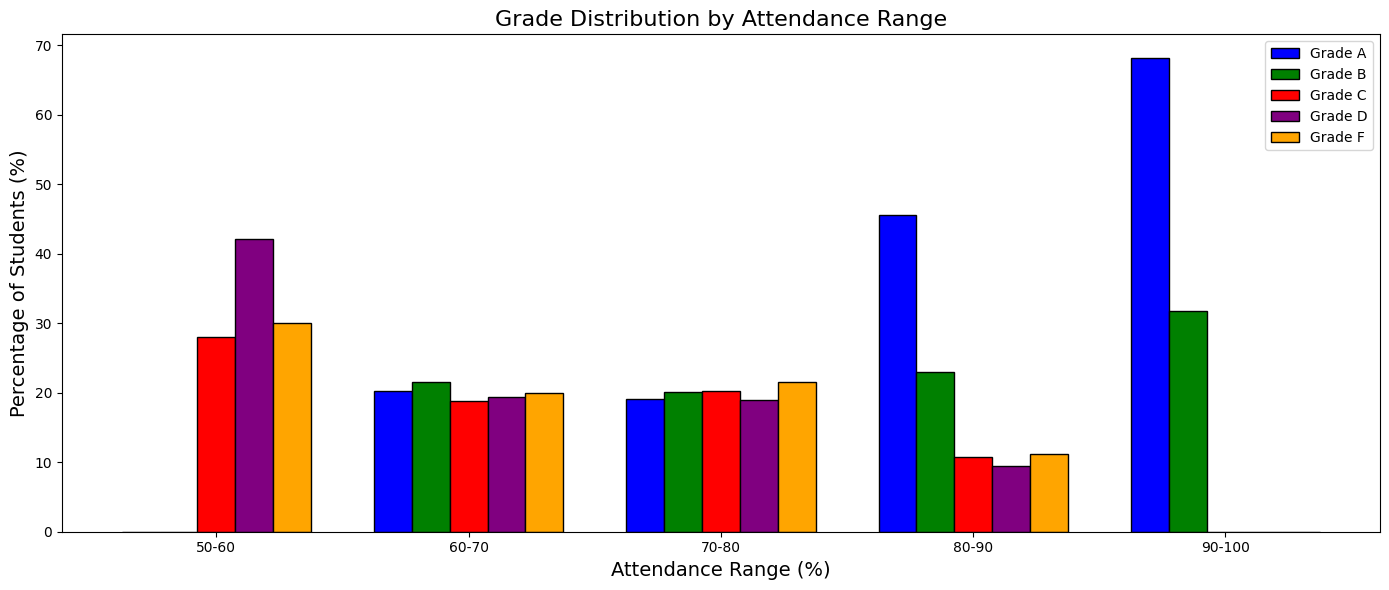

In [43]:
# Group data by attendance ranges and calculate grade distribution
attendance_ranges = ['50-60', '60-70', '70-80', '80-90', '90-100']
grades = ['A', 'B', 'C', 'D', 'F']
data_stack_records = []  # List to store dictionary records

for range_str in attendance_ranges:
    # Determine boundaries of the range
    lower, upper = map(int, range_str.split('-'))
    temp_df = students_grading[(students_grading['Attendance (%)'] >= lower) & (students_grading['Attendance (%)'] < upper)]
    
    if temp_df.empty:  # Skip empty bins to avoid NaN-related issues
        continue

    grade_counts = temp_df['Grade'].value_counts()
    total = grade_counts.sum()
    grade_percentages = {f'Grade {grade} (%)': (grade_counts.get(grade, 0) / total * 100) for grade in grades}
    
    grade_percentages['Attendance Range'] = range_str
    data_stack_records.append(grade_percentages)

# Convert list of dictionaries to a DataFrame
data_stack = pd.DataFrame.from_records(data_stack_records).fillna(0)
# Bar Plot for visualizing
plt.figure(figsize=(14, 6))
bar_width = 0.15
positions = np.arange(len(data_stack))
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Stacking the bar plot for each range
offset = 0
for i, grade in enumerate(grades):
    plt.bar(positions + offset, 
            data_stack[f'Grade {grade} (%)'].astype(float), 
            bar_width, label=f'Grade {grade}', color=colors[i], edgecolor='black')
    offset += bar_width

plt.xticks(positions + bar_width * 2, data_stack['Attendance Range'])
plt.xlabel('Attendance Range (%)', fontsize=14)
plt.ylabel('Percentage of Students (%)', fontsize=14)
plt.title('Grade Distribution by Attendance Range', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()
